In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# 设置Matplotlib的字体
# 接下来绘制图表，中文标签应该可以正确显示了
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei'是黑体的意思
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [3]:
#导入数据
data=pd.read_excel(r'D:\projects\XGBoost\all.xlsx')
data.head() #查看原始数据前5行

,客户ID,性别,有无汽车,有无财产,子女数,年收入(美元),收入类型,教育水平,婚姻状况,住房类型,Birthday_count,就业时间,有无手机,有无工作电话号码,有无电话号码,有无登记email,职业类型,家庭成员数量,是否批准
0,NaN,NaN,NaN,NaN,NaN,NaN,Pensioner：领取养老金，Commercial associate：商业收入，如销售、...,Secondary / secondary special：中等专业教育，Lower sec...,NaN,NaN,使用当天 （0） 的倒数计数，-1 表示昨天,就业开始日期。从当前天数（0）开始倒数。正值表示个人目前失业,NaN,0：没有登记工作电话号码；1：有登记工作电话号码,NaN,NaN,NaN,NaN,0 表示申请已获批准，1 表示申请被拒绝
1,5008827.0,M,Y,Y,0.0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772,365243,1.0,0,0.0,0.0,NaN,2.0,1
2,5009744.0,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1.0,1,1.0,0.0,NaN,2.0,1
3,5009746.0,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1.0,1,1.0,0.0,NaN,2.0,1
4,5009749.0,F,Y,N,0.0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1.0,1,1.0,0.0,NaN,2.0,1


In [7]:
#删去第一行的变量说明
df=data.iloc[1:]

# 计算每列的缺失值数量
missing_values_count = df.isnull().sum()

# 筛选出有缺失值的列
missing_values = missing_values_count[missing_values_count > 0]

# 计算百分比
missing_percentage = ((missing_values / len(df)) * 100).round(2)

# 创建一个DataFrame来展示结果
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage})
missing_df
# 输出到Excel文件， index=False不保留行名
# missing_df.to_excel(r"D:\projects\XGBoost\缺失值百分比.xlsx")


,Missing Count,Percentage
性别,7,0.45
年收入(美元),23,1.49
Birthday_count,22,1.42
职业类型,488,31.52


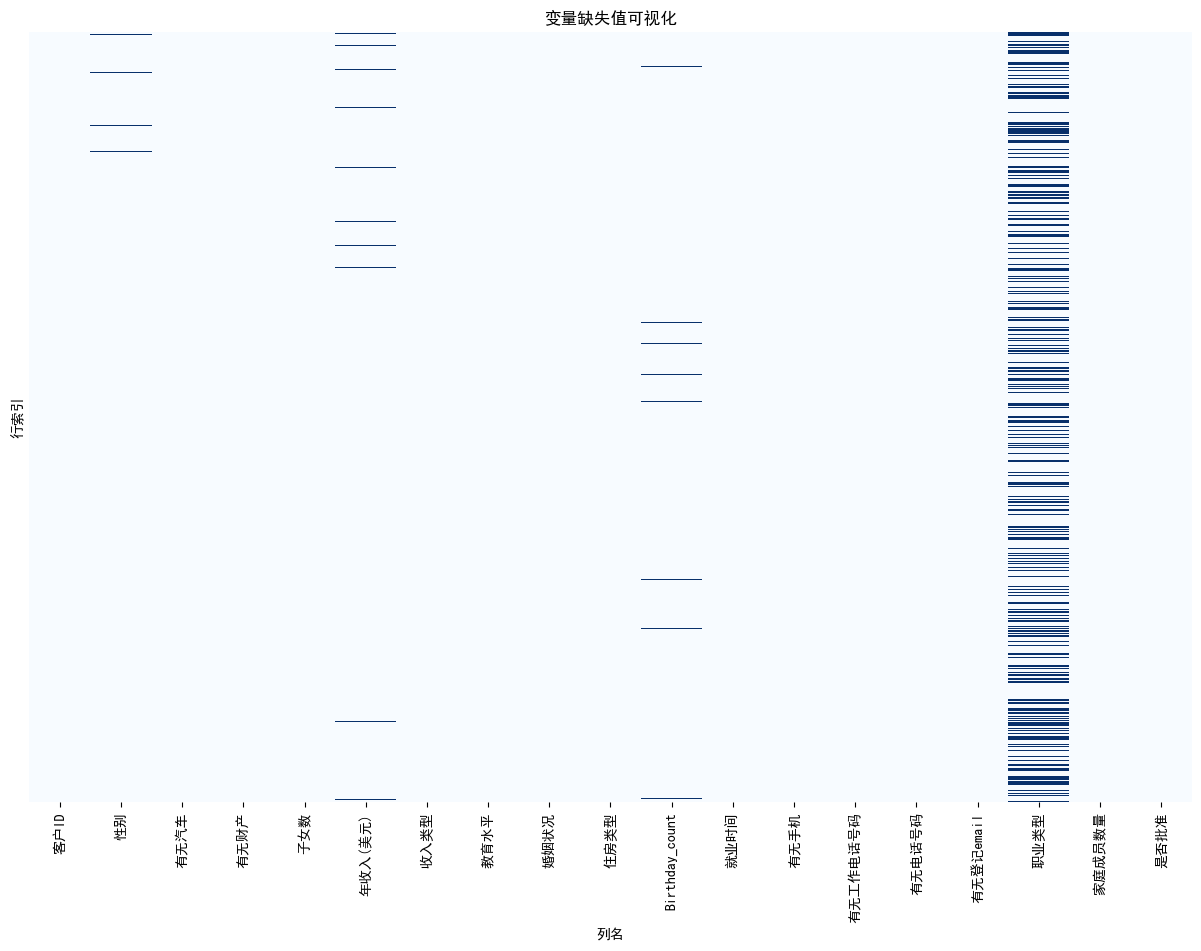

In [8]:
# 计算缺失值
missing = df.isnull()

# 设置画布大小
plt.figure(figsize=(15, 10))

# 创建热图，使用蓝色系颜色映射
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='Blues')

# 添加标题
# 设置Matplotlib的字体
# 接下来绘制图表，中文标签应该可以正确显示了
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei'是黑体的意思
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
plt.title('变量缺失值可视化')
plt.xlabel('列名')
plt.ylabel('行索引')

# 显示图形
plt.show()

In [9]:
# 删除“性别”列中含有缺失值的行
df = df.dropna(subset=['性别','Birthday_count'])

#年收入：中位数填补
median_income = df['年收入(美元)'].median()# 计算“年收入”列的中位数

# 使用中位数填充“年收入”列的缺失值
df['年收入(美元)'].fillna(median_income, inplace=True)

# 将“职业类型”列的缺失值赋值为0
df['职业类型'].fillna(0, inplace=True)

# 判断整个DataFrame是否含有任何缺失值
has_missing_values = df.isnull().any().any()

# 输出结果
if has_missing_values:
    print("Data中存在缺失值。")
else:
    print("Data中不存在缺失值。")

Data中不存在缺失值。


C:\Users\19795\AppData\Local\Temp\ipykernel_70628\2755360561.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['年收入(美元)'].fillna(median_income, inplace=True)
C:\Users\19795\AppData\Local\Temp\ipykernel_70628\2755360561.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
df=df.iloc[:,1:19] #删去第一列客户ID
df

,性别,有无汽车,有无财产,子女数,年收入(美元),收入类型,教育水平,婚姻状况,住房类型,Birthday_count,就业时间,有无手机,有无工作电话号码,有无电话号码,有无登记email,职业类型,家庭成员数量,是否批准
1,M,Y,Y,0.0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772,365243,1.0,0,0.0,0.0,0,2.0,1
2,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1.0,1,1.0,0.0,0,2.0,1
4,F,Y,N,0.0,166050.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1.0,1,1.0,0.0,0,2.0,1
5,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1.0,1,1.0,0.0,0,2.0,1
7,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1.0,1,1.0,0.0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,F,N,Y,0.0,166050.0,Commercial associate,Higher education,Married,House / apartment,-11957,-2182,1.0,0,0.0,0.0,Managers,2.0,0
1545,F,N,N,0.0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229,-1209,1.0,0,0.0,0.0,Accountants,1.0,0
1546,M,Y,Y,2.0,180000.0,Working,Higher education,Married,House / apartment,-13174,-2477,1.0,0,0.0,0.0,Managers,4.0,0
1547,M,Y,N,0.0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292,-645,1.0,1,1.0,0.0,Drivers,2.0,0


In [12]:
import pandas as pd

# 替换“性别”列："M" → 0, "F" → 1
df['性别'] = df['性别'].replace({'M': 0, 'F': 1}).astype(int)

# 替换“有无汽车”和“有无财产”列："N" → 0, "Y" → 1
df['有无汽车'] = df['有无汽车'].replace({'N': 0, 'Y': 1}).astype(int)
df['有无财产'] = df['有无财产'].replace({'N': 0, 'Y': 1}).astype(int)

# 替换“收入类型”
income_type_mapping = {
    'Pensioner': 1,
    'Commercial associate': 2,
    'Working': 3,
    'State servant': 4
}
df['收入类型'] = df['收入类型'].replace(income_type_mapping).astype(int)

# 替换“教育水平”
jy_mapping = {
    'Higher education': 1,
    'Secondary / secondary special': 2,
    'Lower secondary': 3,
    'Incomplete higher': 4,
    'Academic degree': 5
}
df['教育水平'] = df['教育水平'].replace(jy_mapping).astype(int)

# 替换“婚姻状况”
hun_mapping = {
    'Married': 1,
    'Single / not married': 2,
    'Civil marriage': 3,
    'Separated': 4,
    'Widow': 5
}
df['婚姻状况'] = df['婚姻状况'].replace(hun_mapping).astype(int)

# 替换“住房类型”
house_mapping = {
    'House / apartment': 1,
    'With parents': 2,
    'Rented apartment': 3,
    'Municipal apartment': 4,
    'Co-op apartment': 5,
    'Office apartment': 6
}
df['住房类型'] = df['住房类型'].replace(house_mapping).astype(int)

# 替换“职业类型”
work_mapping = {
    'Core staff': 1,
    'Cooking staff': 2,
    'Laborers': 3,
    'Sales staff': 4,
    'Accountants': 5,
    'Managers': 6,
    'Cleaning staff': 7,
    'Drivers': 8,
    'Low-skill Laborers': 9,
    'High skill tech staff': 10,
    'IT staff': 11,
    'Waiters/barmen staff': 12,
    'Security staff': 13,
    'Medicine staff': 14,
    'Private service staff': 15,
    'HR staff': 16,
    'Secretaries': 17,
    'Realty agents': 18
}
df['职业类型'] = df['职业类型'].replace(work_mapping).astype(int)


In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter   #collections库中的Counter()方法，对目标变量进行计数
from imblearn.over_sampling import SMOTE   #SMOTE过采样
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

#转换为数值型
df['是否批准'] = pd.to_numeric(df['是否批准'], errors='coerce')
df['Birthday_count'] = pd.to_numeric(df['Birthday_count'], errors='coerce')
df['有无工作电话号码'] = pd.to_numeric(df['有无工作电话号码'], errors='coerce')
df['就业时间'] = pd.to_numeric(df['就业时间'], errors='coerce')
df['有无手机'] = pd.to_numeric(df['有无手机'], errors='coerce')

# 显示原始类别分布
print("原始类别分布:", Counter(df['是否批准']))

# 将数据集分割成特征（X）和目标标签（y）
y = df['是否批准']
X = df.iloc[:, 0:16]

# 使用ADASYN进行过采样
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)


# 显示新的类别分布（仅在训练集上应用SMOTE）
print("新的类别分布:", Counter(y_resampled))
df_res = pd.concat([X_resampled, y_resampled], axis=1)

原始类别分布: Counter({0: 1351, 1: 168})
新的类别分布: Counter({1: 1362, 0: 1351})


d:\AppDownload\Anaconda202406\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\AppDownload\Anaconda202406\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


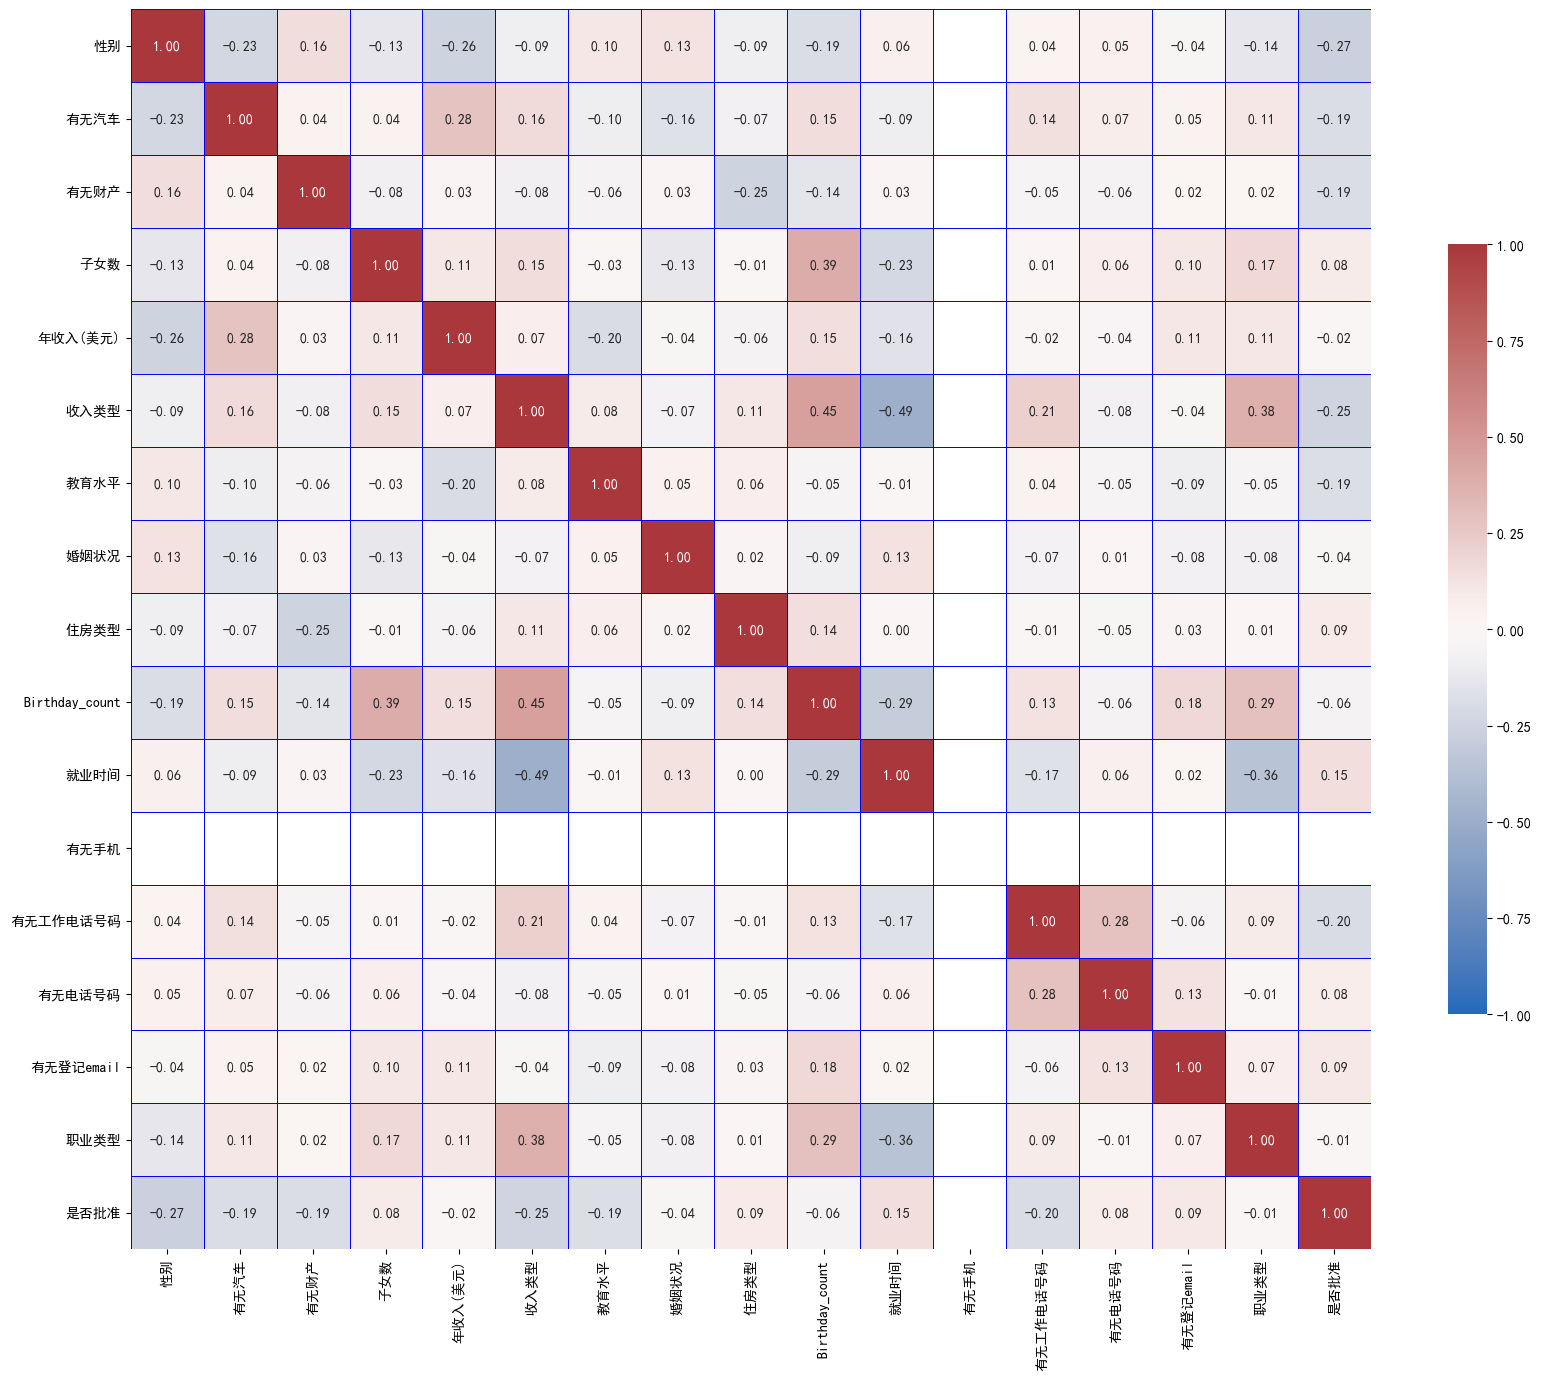

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
# 设置Matplotlib的字体
# 接下来绘制图表，中文标签应该可以正确显示了
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei'是黑体的意思
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# df_res 是特征数据，且带有列名
# 使用 scipy.stats.spearmanr 计算斯皮尔曼相关系数
corr, _ = spearmanr(df_res)
correlation_matrix = np.array(corr)  # 将结果转换为numpy数组

# 使用一个更高级的颜色方案来绘制热力图
plt.subplots(figsize=(20,20))

# 获取列名
column_labels = df_res.columns

# 绘制热力图
sns.heatmap(correlation_matrix,
            annot=True,  # 显示相关系数的数据
            center=0,  # 数据居中，由于相关系数在-1到1之间
            fmt='.2f',  # 只显示两位小数
            linewidths=0.4,  # 设置每个单元格的辝离
            linecolor='blue',  # 设置间距线的颜色
            vmin=-1, vmax=1,  # 设置数值最小值和最大值
            xticklabels=column_labels, yticklabels=column_labels,  # 显示列名作为x轴和y轴标签
            square=True,  # 每个方格都是正方形
            cbar_kws={'shrink': 0.5},  # 缩小颜色条
            cmap='vlag',  # 设置热力图颜色为"vlag"
            )


# 保存图片到本地
plt.savefig(r"D:\projects\XGBoost\相关系数热力图.png", dpi=300)

plt.show()  # 显示图片

           Feature  Importance
9   Birthday_count    0.149720
4          年收入(美元)    0.122095
10            就业时间    0.115693
13          有无电话号码    0.096534
5             收入类型    0.069256
3              子女数    0.068944
15            职业类型    0.068127
0               性别    0.066315
1             有无汽车    0.048711
6             教育水平    0.042385
2             有无财产    0.037977
7             婚姻状况    0.036279
12        有无工作电话号码    0.031708
14       有无登记email    0.024874
8             住房类型    0.021381
11            有无手机    0.000000


C:\Users\19795\AppData\Local\Temp\ipykernel_70628\901174072.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


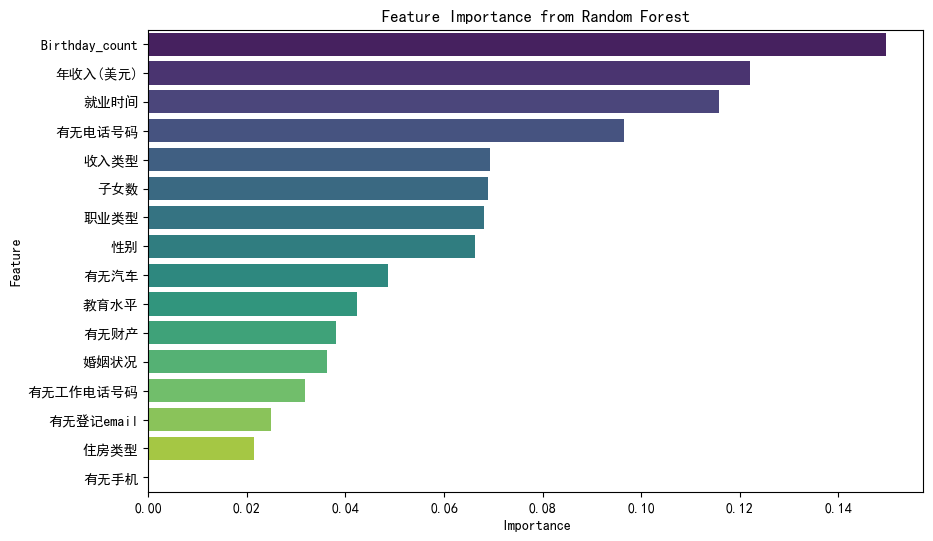

In [15]:
from sklearn.ensemble import RandomForestClassifier

# 将目标标签和特征分开
X_resampled
y_resampled

# 创建随机森林分类器
rf_classifier = RandomForestClassifier(random_state=42)

# 在训练数据上拟合随机森林模型
rf_classifier.fit(X_resampled, y_resampled)

# 获取特征的重要性
feature_importances = rf_classifier.feature_importances_

# 创建一个DataFrame，显示每个特征和其重要性
importance_df = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importances})

# 按重要性降序排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 显示结果
print(importance_df)

import matplotlib.pyplot as plt
import seaborn as sns
# 设置图形的大小
plt.figure(figsize=(10, 6))

# 使用seaborn绘制条形图
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# 添加标题和标签
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

# 显示图形
plt.show()

In [16]:
X_resampled=X_resampled[['Birthday_count','年收入(美元)','就业时间','有无电话号码','收入类型','子女数','职业类型','性别','有无汽车']]

In [17]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)
X_train

,Birthday_count,年收入(美元),就业时间,有无电话号码,收入类型,子女数,职业类型,性别,有无汽车
556,-15256,157500.000000,-4491,0.0000,2,0.000000,3,1,0
1917,-17973,180000.000000,-5195,0.0000,2,2.314702,3,1,0
807,-14897,306000.000000,-3435,1.0000,2,0.000000,0,1,0
926,-10676,157500.000000,-2326,1.0000,2,1.000000,3,0,0
429,-17579,135000.000000,-1904,0.0000,3,0.000000,3,1,0
...,...,...,...,...,...,...,...,...,...
1147,-17532,90000.000000,-8044,0.0000,4,1.000000,14,1,1
2154,-19896,225000.000000,-1595,0.5718,3,0.000000,8,0,0
1766,-23522,73770.252495,365243,0.0000,1,0.000000,0,0,0
1122,-10728,135000.000000,-1619,1.0000,3,1.000000,5,1,0


Accuracy: 0.8950
Precision: 0.9119
Recall: 0.8750
F1 Score: 0.8931
Confusion Matrix:
[[248  23]
 [ 34 238]]


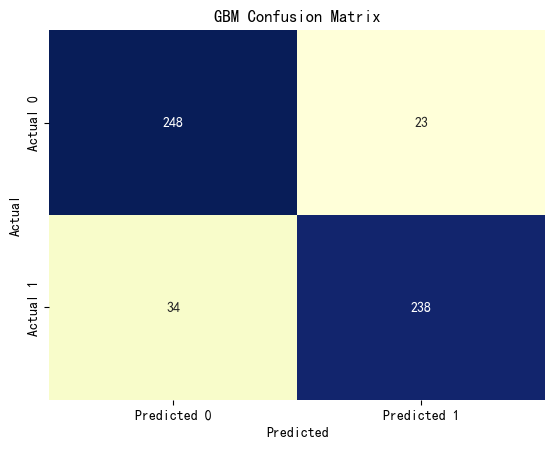

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=123)
model.fit(X_train, y_train)
# 预测验证集数据
y_pred = model.predict(X_test)

# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



# 计算预测概率
model1_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率
# model1_probs现在包含了验证集每个样本属于第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('GBM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[LightGBM] [Info] Number of positive: 1090, number of negative: 1080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1245
[LightGBM] [Info] Number of data points in the train set: 2170, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502304 -> initscore=0.009217
[LightGBM] [Info] Start training from score 0.009217
Accuracy: 0.9595
Precision: 0.9433
Recall: 0.9779
F1 Score: 0.9603
Confusion Matrix:
[[255  16]
 [  6 266]]


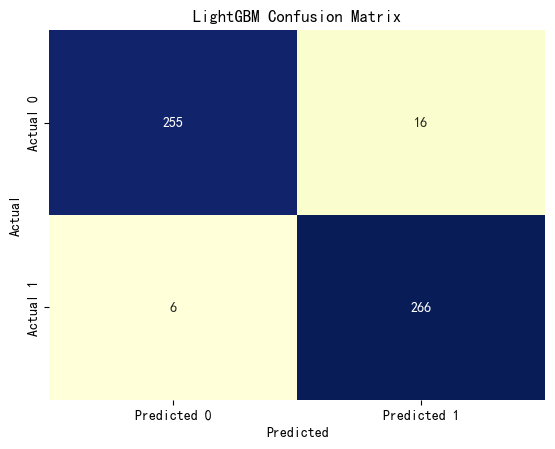

In [19]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 创建 LightGBM 分类器
model = lgb.LGBMClassifier(objective='binary', random_state=0)
model.fit(X_train, y_train)# 在训练集上拟合模型
y_pred = model.predict(X_test)# 在测试集上进行预测



# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



# 计算预测概率
model2_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('LightGBM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.9558
Precision: 0.9429
Recall: 0.9706
F1 Score: 0.9565
Confusion Matrix:
[[255  16]
 [  8 264]]


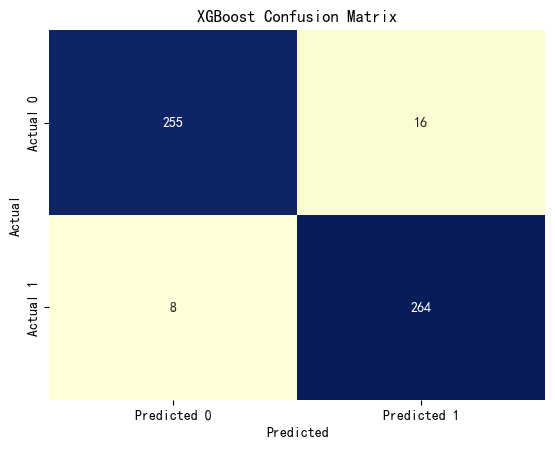

In [20]:
# XGBoost分类模型的引入方式：
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
# 预测验证集数据
y_pred = model.predict(X_test)

# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# 计算预测概率
model3_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率


# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 假设您已有 X_train 和 y_train

# XGBoost 的评估函数
def xgb_evaluate(max_depth, learning_rate, n_estimators, min_child_weight):
    params = {'max_depth': int(max_depth),
              'learning_rate': learning_rate,
              'n_estimators': int(n_estimators),
              'min_child_weight': min_child_weight,
              'objective': 'binary:logistic'}
    cv_result = cross_val_score(XGBClassifier(**params), X_train, y_train, cv=3, scoring='accuracy')
    return np.mean(cv_result)

# 设置贝叶斯优化的参数范围
pbounds = {'max_depth': (2, 10),
           'learning_rate': (0.01, 0.3),
           'n_estimators': (10,300),
           'min_child_weight': (1,10)}

# 初始化贝叶斯优化
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=pbounds, random_state=42)

# 执行优化
optimizer.maximize(init_points=2, n_iter=5)

# 输出最优参数
print(optimizer.max)

|   iter    |  target   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9032    | 0.1186    | 9.606     | 7.588     | 183.6     |
| 2         | 0.853     | 0.05525   | 3.248     | 1.523     | 261.2     |
| 3         | 0.9041    | 0.2902    | 9.761     | 8.786     | 184.2     |
| 4         | 0.8986    | 0.1793    | 8.911     | 9.98      | 121.6     |
| 5         | 0.8691    | 0.1878    | 5.634     | 9.78      | 60.49     |
| 6         | 0.847     | 0.3       | 2.0       | 10.0      | 152.5     |
| 7         | 0.9101    | 0.2542    | 9.491     | 4.15      | 201.1     |
{'target': 0.9101280219262383, 'params': {'learning_rate': 0.2542418549566294, 'max_depth': 9.49098832223992, 'min_child_weight': 4.150461241484944, 'n_estimators': 201.05541677659158}}


# 调优后XGB

Accuracy: 0.9521
Precision: 0.9301
Recall: 0.9779
F1 Score: 0.9534
Confusion Matrix:
[[251  20]
 [  6 266]]


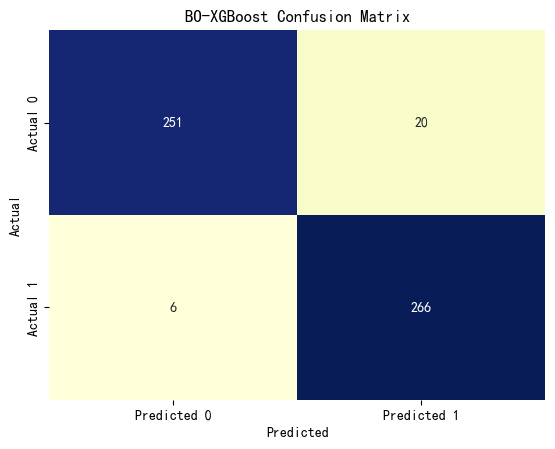

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=9, 
                      learning_rate=0.25, 
                      n_estimators=201,
                      min_child_weight=4)
model.fit(X_train, y_train)
# 预测验证集数据
y_pred = model.predict(X_test)


# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# 计算预测概率
model9_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率


# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('BO-XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0:	learn: 0.6550278	total: 150ms	remaining: 44.9s
1:	learn: 0.6204945	total: 165ms	remaining: 24.6s
2:	learn: 0.5905739	total: 179ms	remaining: 17.7s
3:	learn: 0.5628732	total: 192ms	remaining: 14.2s
4:	learn: 0.5383965	total: 205ms	remaining: 12.1s
5:	learn: 0.5168990	total: 219ms	remaining: 10.7s
6:	learn: 0.4979117	total: 231ms	remaining: 9.67s
7:	learn: 0.4798526	total: 246ms	remaining: 8.96s
8:	learn: 0.4663634	total: 261ms	remaining: 8.42s
9:	learn: 0.4508255	total: 275ms	remaining: 7.97s
10:	learn: 0.4385623	total: 289ms	remaining: 7.58s
11:	learn: 0.4257606	total: 303ms	remaining: 7.27s
12:	learn: 0.4145653	total: 317ms	remaining: 7s
13:	learn: 0.4072175	total: 329ms	remaining: 6.73s
14:	learn: 0.3973968	total: 341ms	remaining: 6.47s
15:	learn: 0.3890115	total: 353ms	remaining: 6.26s
16:	learn: 0.3764736	total: 367ms	remaining: 6.11s
17:	learn: 0.3677843	total: 384ms	remaining: 6.01s
18:	learn: 0.3589720	total: 399ms	remaining: 5.9s
19:	learn: 0.3498661	total: 415ms	remaining: 

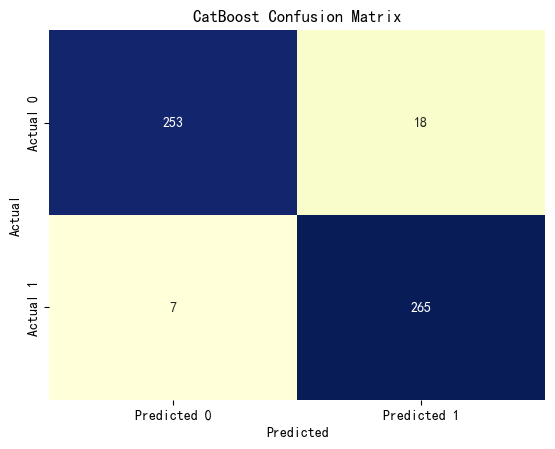

In [25]:
import catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=300, depth=10, learning_rate=0.05, loss_function='Logloss', random_state=0)
model.fit(X_train, y_train, cat_features=[])
y_pred = model.predict(X_test)

# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 计算预测概率
model4_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('CatBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林模型
model = RandomForestClassifier(n_estimators=200,
                               random_state=123)

# 训练模型
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

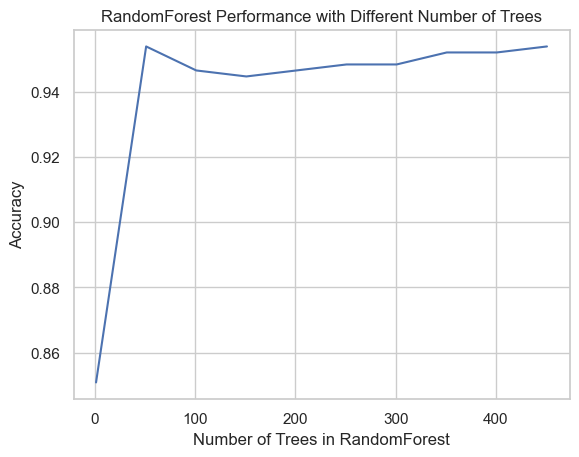

In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 假设您已经有了 X_train, y_train, X_test, y_test
n_estimators_range =range(1, 501, 50)  # 树的数量从1到100
accuracies = []

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 设置Seaborn样式
sns.set(style="whitegrid")

#绘制曲线
plt.plot(n_estimators_range, accuracies)
plt.xlabel('Number of Trees in RandomForest')
plt.ylabel('Accuracy')
plt.title('RandomForest Performance with Different Number of Trees')
plt.show()

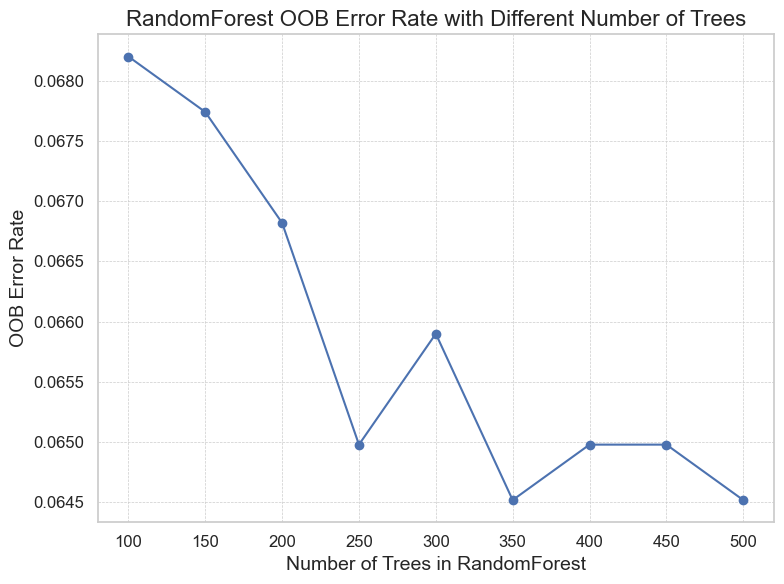

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 假设您已经有了 X_train 和 y_train
n_estimators_range = range(100, 501, 50)  # 将树的数量从100开始，以50为步长增加至500
oob_errors = []

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=123, bootstrap=True)
    model.fit(X_train, y_train)
    oob_error = 1 - model.oob_score_
    oob_errors.append(oob_error)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns  # 引入Seaborn库增强视觉效果

# 设置Seaborn样式
sns.set(style="whitegrid")


# 绘制图表
plt.figure(figsize=(8, 6))  # 设置图表大小
plt.plot(n_estimators_range, oob_errors, marker='o', linestyle='-', color='b')  # 带标记的线条
plt.xlabel('Number of Trees in RandomForest', fontsize=14)
plt.ylabel('OOB Error Rate', fontsize=14)
plt.title('RandomForest OOB Error Rate with Different Number of Trees', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格
plt.tight_layout()
plt.show()

# 网格搜索RF

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 定义参数网格
param_grid = {
    'max_depth': [5,10, 20, 30, 40],
    'min_samples_split': [ 2,4, 6, 8, 10],
    'min_samples_leaf': [2, 3, 4, 5,6]
}

# 创建随机森林模型
rf = RandomForestClassifier(n_estimators=200,random_state=123)

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 查找最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳参数创建新模型
best_rf = RandomForestClassifier(**best_params, random_state=42)

# 训练新模型
best_rf.fit(X_train, y_train)

# 预测测试集
y_pred = best_rf.predict(X_test)

# 评估模型
score = accuracy_score(y_test, y_pred)
print("Accuracy with Best Parameters:", score)

# results 是网格搜索的结果
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy with Best Parameters: 0.9447513812154696


# 调优后随机森林

Accuracy: 0.9558
Precision: 0.9526
Recall: 0.9596
F1 Score: 0.9560
Confusion Matrix:
[[258  13]
 [ 11 261]]


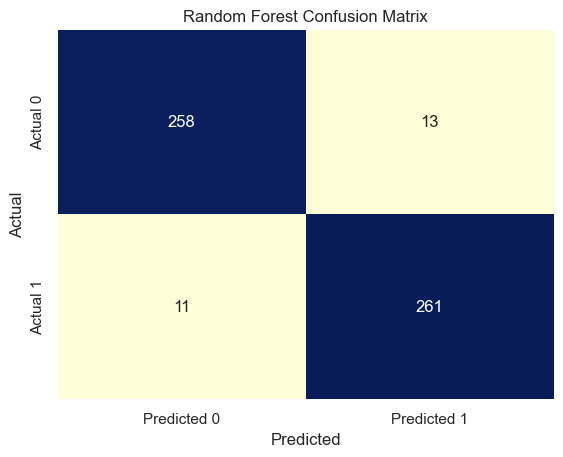

In [30]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林模型
model = RandomForestClassifier(n_estimators=200,
                               max_depth=30,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               random_state=123)

# 训练模型
model.fit(X_train, y_train)

# 预测验证集数据
y_pred = model.predict(X_test)

# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 计算预测概率
model5_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

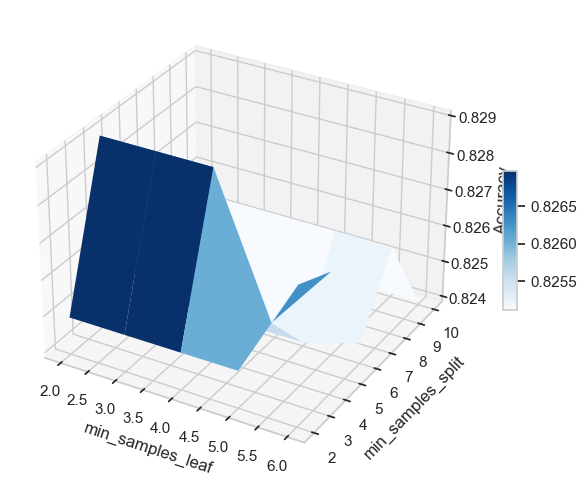

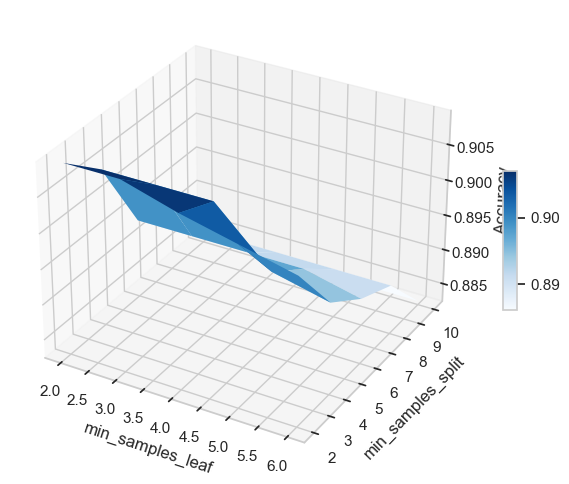

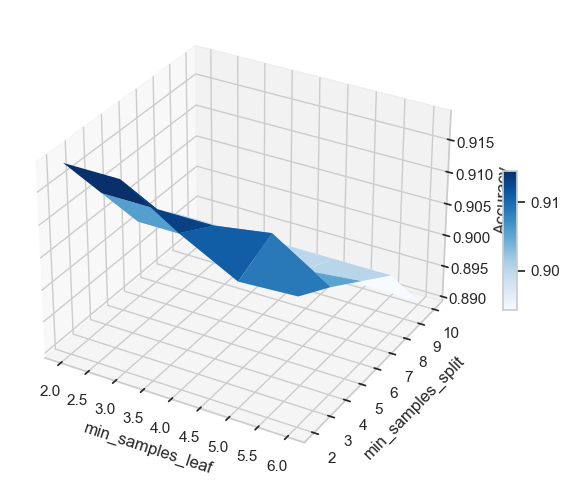

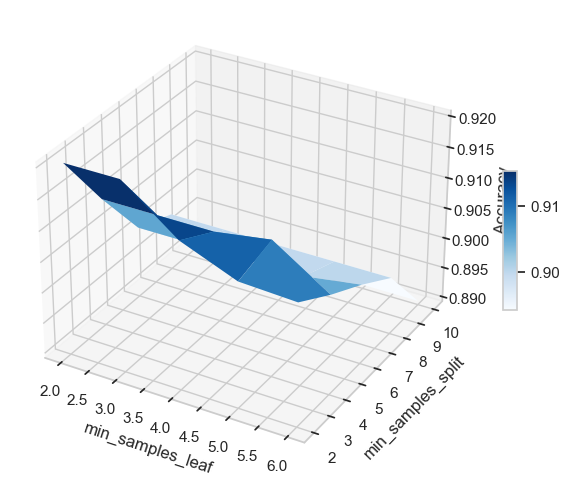

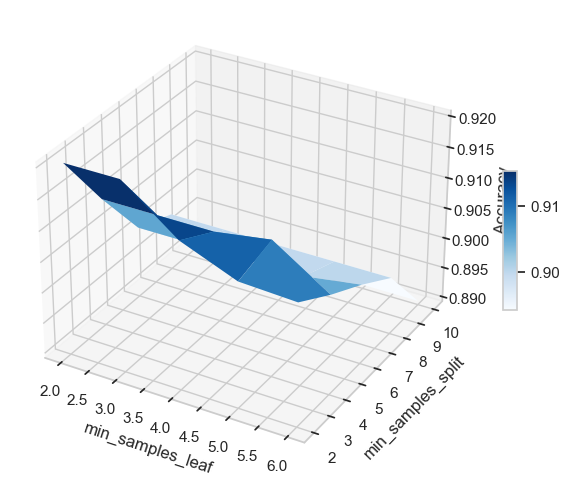

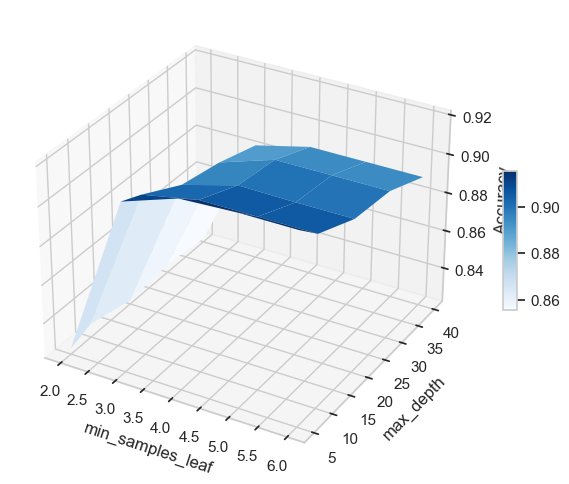

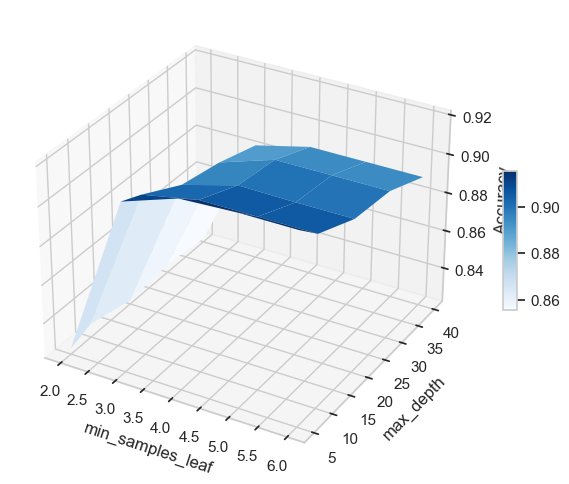

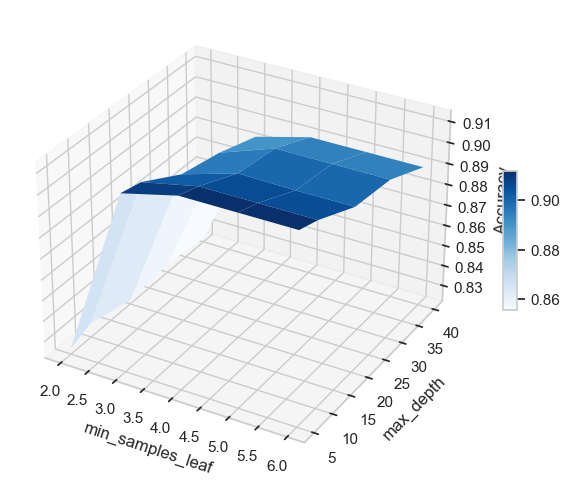

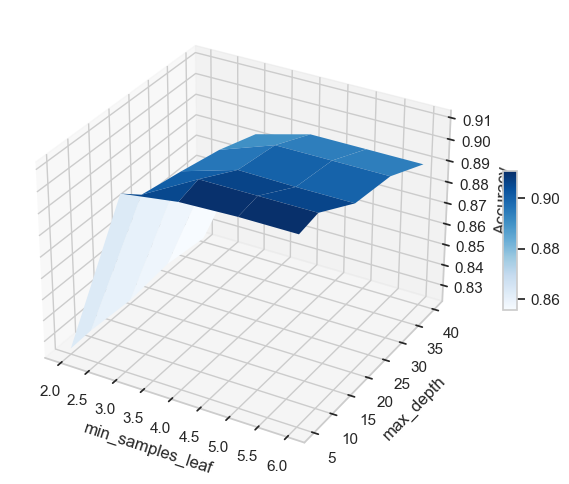

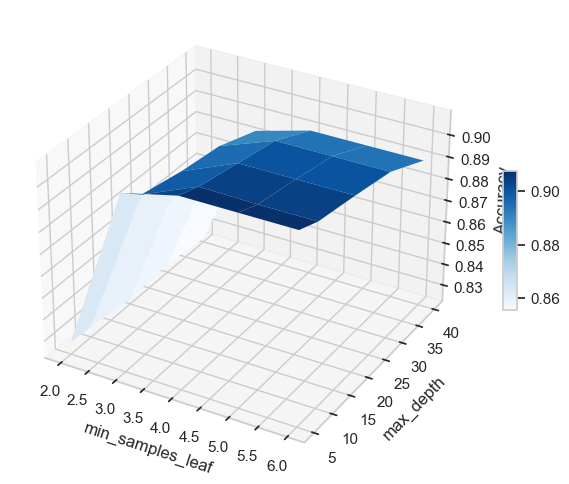

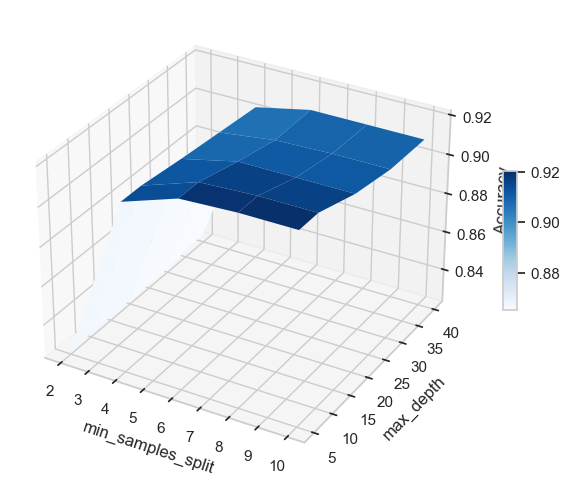

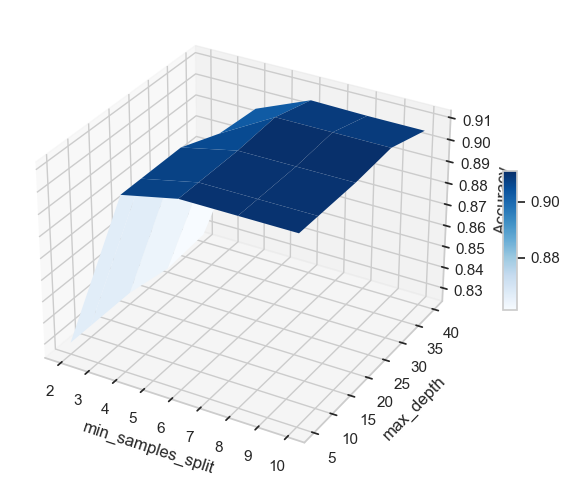

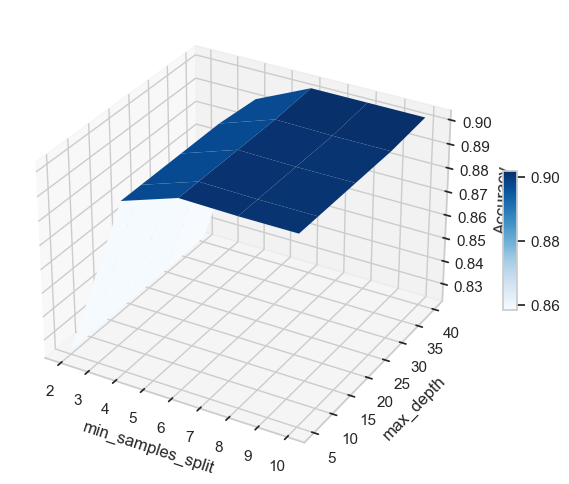

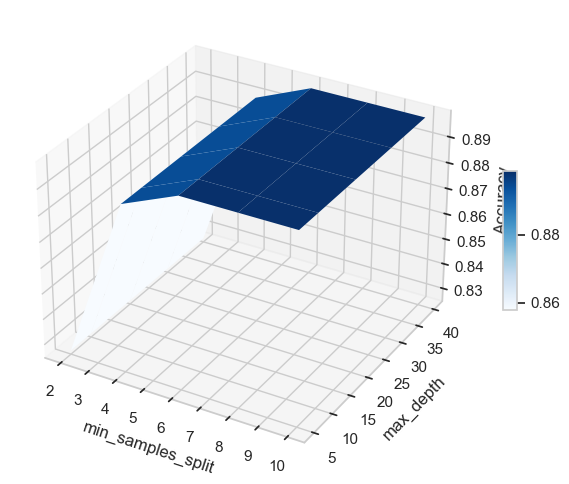

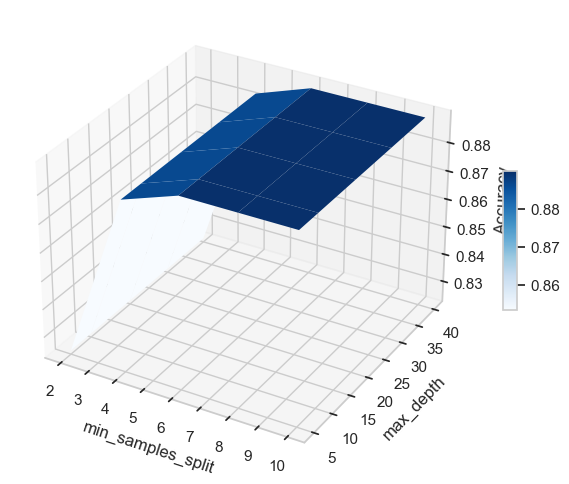

In [31]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# 函数：绘制3D曲面图
def plot_surface(X, Y, Z, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    fig.colorbar(surf, shrink=0.3, aspect=10)  # 缩小颜色条宽度
    plt.show()


# 创建每个超参数组合的3D曲面图
for param in param_grid:
    other_params = list(set(param_grid) - set([param]))
    for value in param_grid[param]:
        df = results[results[f'param_{param}'] == value]
        X, Y = np.meshgrid(sorted(df[f'param_{other_params[0]}'].unique()), 
                           sorted(df[f'param_{other_params[1]}'].unique()))
        Z = df.pivot_table(index=f'param_{other_params[0]}', 
                           columns=f'param_{other_params[1]}', 
                           values='mean_test_score')
        Z = Z.reindex(index=sorted(df[f'param_{other_params[0]}'].unique()), 
                      columns=sorted(df[f'param_{other_params[1]}'].unique())).values
        Z = np.nan_to_num(Z)
        plot_surface(X, Y, Z, other_params[0], other_params[1], 'Accuracy')

d:\AppDownload\Anaconda202406\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8103
Precision: 0.8449
Recall: 0.7610
F1 Score: 0.8008
Confusion Matrix:
[[233  38]
 [ 65 207]]


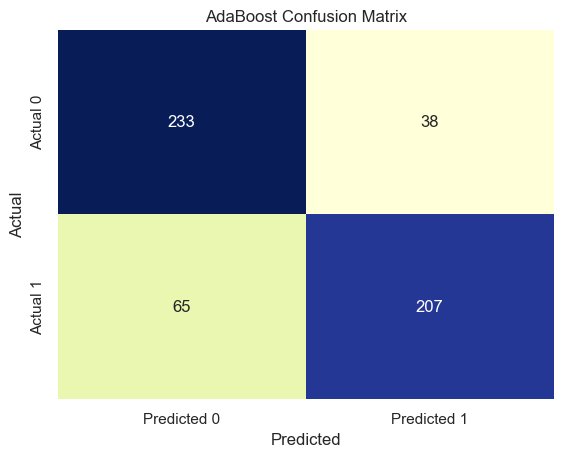

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=123)
model.fit(X_train, y_train)
# 预测验证集数据
y_pred = model.predict(X_test)
# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 计算预测概率
model8_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.7311
Precision: 0.7603
Recall: 0.6765
F1 Score: 0.7160
Confusion Matrix:
[[213  58]
 [ 88 184]]


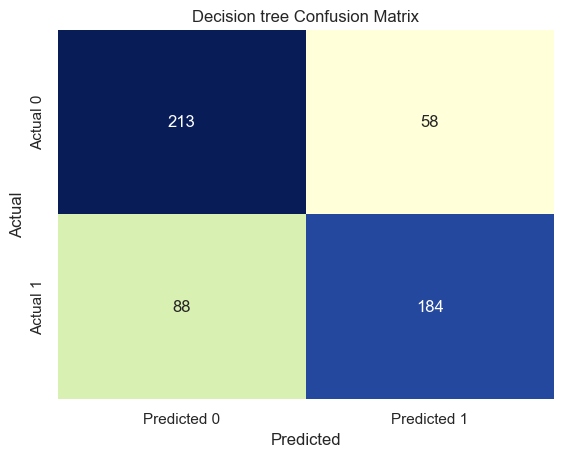

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, 
                               min_samples_split=5,
                               min_samples_leaf=2,
                               random_state=0)
model.fit(X_train, y_train)
# 预测验证集数据
y_pred = model.predict(X_test)
# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 计算预测概率
model7_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Decision tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

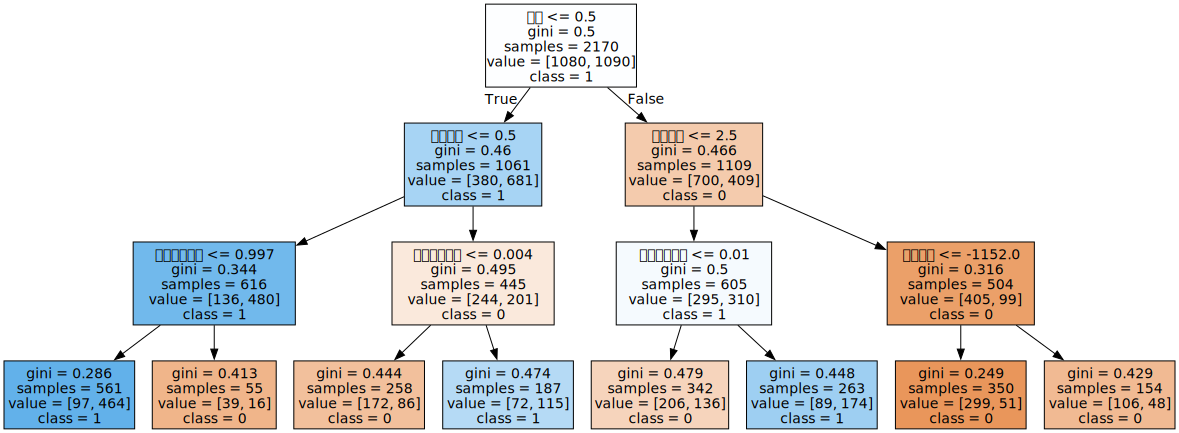

In [35]:
# 决策树可视化，安装graphviz
from sklearn.tree import export_graphviz
import graphviz

# 以下两行是环境变量配置，运行一次即可
import os  
os.environ['PATH'] = os.pathsep + r'C:\Program Files\Graphviz\bin'

feature_names = ['Birthday_count', '年收入(美元)', '就业时间', '有无电话号码','收入类型','子女数','职业类型','性别','有无汽车']  # 用您数据集中的实际特征名称替换

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=feature_names,  # 添加特征名称
                           class_names=['0', '1'],  # 添加名称（feature_names）和填充颜色（filled=True）
                          filled=True,
                          fontname='SimHei')

# 通过graph.render('决策树可视化')可在代码所在文件夹生成决策树可视化PDF文件
# 添加中文支持
graph_pruned = graphviz.Source(dot_data, format="png", encoding='utf8')

# 可以在指定文件夹保存图片，也可以直接显示在Jupyter Notebook中
graph_pruned.render(r'D:\projects\XGBoost\剪枝后决策树可视化')

graph_pruned#.view('剪枝后决策树可视化')

Accuracy: 0.9595
Precision: 0.9596
Recall: 0.9596
F1 Score: 0.9596
Confusion Matrix:
[[260  11]
 [ 11 261]]


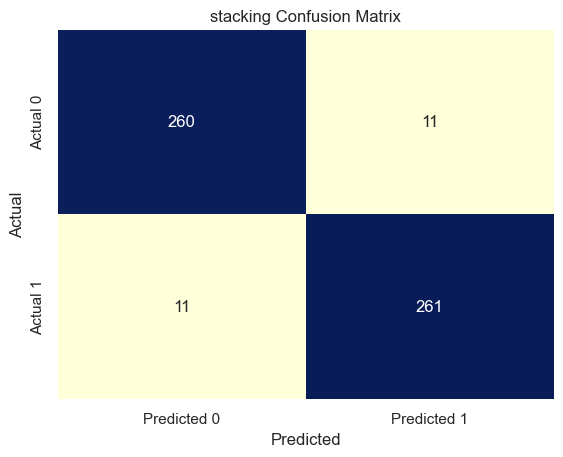

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 定义基本分类器
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=0)),
    #('catboost', CatBoostClassifier(iterations=100, depth=10, learning_rate=0.05, loss_function='Logloss'),
    ('xgboost', XGBClassifier(learning_rate=0.25, n_estimators=200, max_depth=3))
     ]

# 定义元分类器
meta_classifier = LogisticRegression()

# 创建 Stacking 分类器
model = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# 在训练集上拟合模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 计算预测概率
model6_probs = model.predict_proba(X_test)[:, 1]  # 假设我们关注的是第二个类别的概率

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 使用 seaborn 绘制混淆矩阵的热图
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('stacking Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
# 评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9595
Precision: 0.9596
Recall: 0.9596
F1 Score: 0.9596


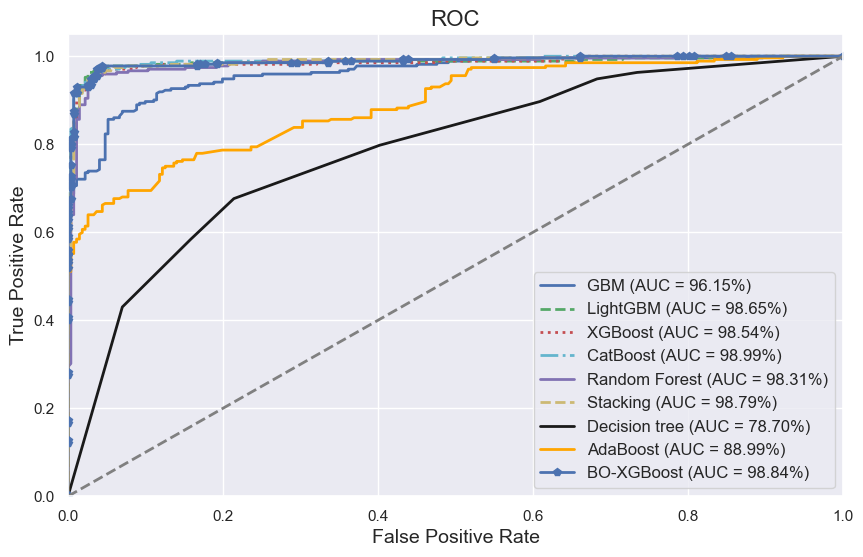

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# 已经有了model1_probs, model2_probs, ..., model8_probs和y_test

model_probs_list = [
    (model1_probs, "GBM", "b-"),
    (model2_probs, "LightGBM", "g--"),
    (model3_probs, "XGBoost", "r:"),
    (model4_probs, "CatBoost", "c-."),
    (model5_probs, "Random Forest", "m-"),
    (model6_probs, "Stacking", "y--"),
    (model7_probs, "Decision tree", "k-"),
    (model8_probs, "AdaBoost", "orange"),
    (model9_probs, "BO-XGBoost", "p-")
]

# 设置灰色背景
sns.set(style="darkgrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 对每个模型的预测概率绘制ROC曲线
for model_probs, label, line_style in model_probs_list:
    fpr, tpr, _ = roc_curve(y_test, model_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, line_style, lw=2, label=f'{label} (AUC = {roc_auc*100:.2f}%)')

# 绘制对角线
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# 设置图形的范围和标签
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# 显示图形
plt.show()